# Movie Recommender System: Building Movie Recommendations with Machine Learning

<img src='https://nb.anaconda.cloud/jupyterhub/user/a2a2dc6f-6467-44f3-b89e-1bb721679838/files/movie.jpg?_xsrf=2%7C75d2dfa2%7Cea269568e63cde6c5fd0b7a72b735e9c%7C1720791501'>

##### Masoud Fattahi Bandpey  July 2024

### 1. Introduction
In today’s world of entertainment, movies have a big impact on how we see the world and feel. With so many movies out there in different types, on different platforms, and in different languages, choosing a movie can be frustrating and time-consuming. Streaming platforms face challenges too. If people can’t easily find movies they enjoy, platforms miss out on revenue opportunities and risk losing users. This highlights the importance of smart movie recommendation systems in both enhancing user experience and driving business success.

A Machine Learning Recommender System is a powerful tool that addresses these challenges. For businesses, its primary objective is to increase user engagement and revenue through personalized movie suggestions and targeted promotions. For users, it’s like having a knowledgeable friend who saves you time by recommending movies tailored to your tastes. This is crucial in an age where the sheer volume of available movies can be overwhelming.

Machine Learning Recommender System also can takes into account various factors to make its recommendations. It considers user profiles, including age and gender, as well as past watching history. It also evaluates movie details like genre, director, and ratings. On top of that, the system observes user behavior on the platform, such as what they click on and how long they watch. All these elements contribute to making personalized and relevant recommendations.

<center>
    <img src="https://nb.anaconda.cloud/jupyterhub/user/a2a2dc6f-6467-44f3-b89e-1bb721679838/files/Screenshot%202024-07-12%20170245.jpg?_xsrf=2%7C75d2dfa2%7Cea269568e63cde6c5fd0b7a72b735e9c%7C1720791501" style="width:50%;">
</center>

In this article, we will explore the algorithms and techniques that enable these features, such as collaborative filtering, content-based filtering, and hybrid models that blend the strengths of both approaches. We will also discuss how the system incorporates layers of personalization through features like weighted scores, genre-specific recommendation, and real-time adaptability based on user behavior.


<center>
    <img src="https://nb.anaconda.cloud/jupyterhub/user/a2a2dc6f-6467-44f3-b89e-1bb721679838/files/Screenshot%202024-07-12%20012351.jpg?_xsrf=2%7C75d2dfa2%7Cea269568e63cde6c5fd0b7a72b735e9c%7C1720791501" alt="Screenshot 2024-07-12 012309" style="width:50%;">
</center>



We will touch upon how the system can cater to various scenarios like group recommendations and cold starts for new users. Special attention we will evaluate the system’s performance using metrics like RMSE (Root Mean Square Error) to gauge its accuracy and reliability.

By the end of this article, we aim to provide a comprehensive understanding of how a Machine Learning Recommender System can transform movie discovery and enjoyment. The system not only enhances the user experience but also serves as a potent tool for businesses in optimizing user engagement and revenue.

### 2. Dataset & Features Description
In this section, we will provide a comprehensive overview of the dataset used for building our movie recommender system. We have employed the Full MovieLens Dataset, which encompasses a rich repository of movie-related information including cast, crew, user-ratings, etc. The dataset can be obtained on Kaggle. Below, we break down the key aspects of the dataset:

#### 2.1. Ratings Dataset (`ratings_small.csv`)
This dataset serves as the backbone for building robust movie recommender systems, capturing user ratings for different movies. Columns:
+ `userId`: Unique identifier for each user, crucial for tracking individual rating behaviors.
+ `movieId`: Unique identifier for each movie, linking the ratings to specific movies.
+ `rating`: The rating score given by the user to a movie, usually on a scale like 0.5-5 or 1-10.
+ `timestamp`: Records the time when the rating was given, valuable for generating time-sensitive recommendations. f
eature of each movies.

#### 2.2. Movies Dataset (`movie.csv`)

A comprehensive collection of movie metadata that includes a variety of features ranging from the film’s title and tagline to its runtime and revenue. Column
+ `id`: Unique identifier for each movie.
+ `genres`: Categorizes each movie into one or multiple genres.
+ `title`: The official title of the movie.
+ `overview`: A brief description or synopsis of the movie.
+ `revenue`: Financial earnings from box office and other sources.
+ `vote_average`: The average rating given by viewers.
+ `vote_count`: The total number of ratings the movie has received.
+ other
s:

#### 2.3. Keywords Dataset (`keywords.csv`)

This dataset enriches the movies with a list of key phrases and words that contains a list of words or phrases that summarize the themes or unique features of each movies. These keywords can serve quick references to understand the main topic of the movies, plot elements, or unique feature of each movies.

**Columns:**
+ `id`: Unique identifier that can be used to merge with the movies dataset.
+ `cast`: Lists the actors and their roles, valuable for actor-based recommendations.
+ `crew`: Specifies the personnel involved in various aspects of production, such as directing and writing, useful for director- or writer-based recommendations.

### 3. Data Preprocessing
#### 3.1 Import Library
Before we dive into the details of building our movie recommender system, let’s set the stage by importing the essential libraries and tools. These libraries will be the building blocks of our data analysis and modeling journey. We’ll also load the dataset files to initiate data exploration and analysis.

In [32]:
# Data Manipulation
import pandas as pd
import numpy as np
from math import sqrt

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Utilities
from ast import literal_eval
from collections import Counter
import datetime
import pickle
from datetime import datetime

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Surprise Library
from surprise import (Reader, Dataset, SVD, SVDpp, KNNBasic, NMF, CoClustering, SlopeOne,
                      NormalPredictor, KNNBaseline, KNNWithMeans, KNNWithZScore, BaselineOnly,
                      accuracy, accuracy)
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

#### 3.2 Merge DataFrames for Comprehensive Data
In this step, we aim to combine different DataFrames into one comprehensive dataset. Here’s how we’ll do it :
1. **Base DataFrame:** Start with movies_df, which contains core details about each movie.
2. **Additional Data:** Use keywords_df and credits_df to enrich this information of the movie.
3. **Merging Criteria:** Link these DataFrames using the unique movie IDs as the common key.

In [34]:
movies_df=pd.read_csv('movies_metadata.csv',low_memory=False).sample(frac=0.25,replace=True,random_state=42)
print(f'the shape of movies_df dataset : {movies_df.shape}')
keywords_df=pd.read_csv('keywords.csv').sample(frac=0.25,replace=True,random_state=42)
print(f'the shape of keywords_df dataset : {keywords_df.shape}')
credits_df=pd.read_csv('credits.csv').sample(frac=0.25,replace=True,random_state=42)
print(f'the shape of credits_df dataset : {credits_df.shape}')

the shape of movies_df dataset : (11366, 24)
the shape of keywords_df dataset : (11605, 2)
the shape of credits_df dataset : (11369, 3)


In [35]:
movies_df = movies_df[~(movies_df['id'].str.contains('-'))]
movies_df['id'] = movies_df['id'].astype('int64')
movies_df = pd.merge(movies_df, keywords_df, on='id', how='left')
movies_df = pd.merge(movies_df, credits_df, on='id', how='left')

#### 3.3 Handle Missing Values
After merging the data, the next step is to deal with missing values. we streamline our dataset by removing unnecessary columns, filling missing text data with ‘Unknown,’ and replacing missing numerical values with 0. This process ensures our data is clean and ready for analysis.

In [37]:
# Drop the specified columns
column_to_drop = ['belongs_to_collection', 'homepage', 'status', 'video']
movies_df = movies_df.drop(column_to_drop, axis=1)

# Replace missing values in text columns with 'Unknown'
text_columns = ['original_language','tagline']
movies_df[text_columns] = movies_df[text_columns].fillna('')

# Replace missing value in number column with 0
number_columns = ['runtime']
movies_df[number_columns] = movies_df[number_columns].fillna(0)

# Drop the missing value rows
movies_df.dropna(inplace=True)
movies_df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,keywords,cast,crew
0,False,90000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",29424,tt0069239,en,Hungry Wives,"A bored, unhappy suburban housewife gets mixed...",1.633103,/3Afgk8B3DwctuxdqDxRxSjwVZ2G.jpg,...,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Every Night is Halloween.,Hungry Wives,5.4,12.0,"[{'id': 616, 'name': 'witch'}, {'id': 3030, 'n...","[{'cast_id': 8, 'character': 'Joan Mitchell', ...","[{'credit_id': '52fe45dec3a368484e0739cb', 'de..."
1,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",56077,tt0120271,en,Talk of Angels,This is the story of a young Irish woman who c...,0.978989,/ipDXrPjOLDBlBA4qB6Lo7Gm3jlI.jpg,...,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",,Talk of Angels,6.8,4.0,"[{'id': 10183, 'name': 'independent film'}]","[{'cast_id': 1, 'character': 'Mary Lavelle', '...","[{'credit_id': '52fe48ecc3a36847f8180ae3', 'de..."
2,False,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 10770,...",202637,tt0071374,en,A Cry in the Wilderness,The father of a wilderness family gets bitten ...,2.6e-05,/iCBKDnCbKvhIpPhYpochC49fyUX.jpg,...,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",,A Cry in the Wilderness,0.0,0.0,"[{'id': 4776, 'name': 'race against time'}, {'...","[{'cast_id': 4, 'character': 'Sam Hadley', 'cr...","[{'credit_id': '5997ae1ec3a36821c8003205', 'de..."
4,False,0,"[{'id': 18, 'name': 'Drama'}]",66487,tt0086377,en,Streamers,Four young recruits about to be sent to Vietna...,0.225313,/92HNckJ0Kf9psYXjB87x6amU9MN.jpg,...,0.0,118.0,[],,Streamers,6.8,4.0,"[{'id': 10183, 'name': 'independent film'}]","[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '52fe473fc3a368484e0bcb8b', 'de..."
5,False,0,"[{'id': 18, 'name': 'Drama'}]",66487,tt0086377,en,Streamers,Four young recruits about to be sent to Vietna...,0.225313,/92HNckJ0Kf9psYXjB87x6amU9MN.jpg,...,0.0,118.0,[],,Streamers,6.8,4.0,"[{'id': 10183, 'name': 'independent film'}]","[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '52fe473fc3a368484e0bcb8b', 'de..."


#### 3. 4 Data Transformation
In this section, we perform essential data format adjustments to make our dataset more suitable for analysis. These steps include converting date columns, standardizing formats, and ensuring numerical compatibility. Let’s dive into the details of these transformations.

In [39]:
ratings_df=pd.read_csv('ratings_small.csv')
ratings_df=ratings_df.sample(frac=0.25,replace=True,random_state=42)
ratings_df.shape

(25001, 4)

In [40]:
# Convert the 'release_date' column to datetime format and extract the year into a new 'year' column
# If the conversion fails, errors are coerced to NaT (Not a Timestamp)
movies_df['year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year

# Convert the 'year' column to integer type, this will convert NaT to its integer representation
movies_df['year'] = movies_df['year'].astype(int)

# Convert the 'release_date' column to datetime format again to standardize its format
# If the conversion fails, errors are coerced to NaT
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format="%Y-%m-%d", errors='coerce')

# Convert the 'popularity' column to float64 type to ensure numerical operations can be performed
movies_df['popularity'] = movies_df['popularity'].astype('float64')

# Convert the 'timestamp' column in ratings_df to datetime format using Unix timestamp
# The lambda function converts each timestamp to a datetime object
ratings_df['timestamp'] = ratings_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

We transforming specific columns to make our dataset more managable for analysis and feature engineering. Columns such as `genres`, `keywords`, `cast`, and `crew` contain complex or text-based data that may not be immediately useful in their current form.

1. **List Transformation:** These columns are converted into lists of elements, making it easier to extract essential information.
2. **Director Extraction:** From the `crew` column, we specifically extract the director's name for each movie as it can be a significant feature for recommendations.
3. **Top Elements:** For columns like `genres` and `keywords`, we limit the data to the top 3 elements if more than 3 elements are present. This helps in reducing dimensionality.
4. **Data Cleaning:** We also clean the text data by converting everything to lower case and removing spaces. This ensures uniformity in text-based features.
5. **Bag of Words:** Finally, a `bag_of_words` column is created by concatenating relevant features. This will serve as a composite feature for our recommendation engine.

In [43]:
# Function to extract values from a column in a DataFrame and extend a target list with these values
def extend_list_from_column(df, column_name, target_list, key='name'):
    # Replace NaN with empty lists and apply literal_eval
    # Then extract values using key and extend the target list
    temp_df = df[column_name].fillna('[]').apply(literal_eval).apply(lambda x: [i[key] for i in x] if isinstance(x, list) else [])
    for i in temp_df:
        if i:
            target_list.extend(i)

# Function to get the director's name from the 'crew' column
def get_director(x):
    return next((i['name'] for i in x if i['job'] == 'Director'), np.nan)

# Function to get the list of top 3 elements or the entire list, whichever is more
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names[:3] if len(names) > 3 else names
    return []

# Function to clean data: Convert strings to lower case and remove spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

# Function to create a bag of words from various columns
def create_bag_of_words(x):
    return ' '.join(x['keywords'] + x['cast'] + [x['director']] + x['genres'])

# Initialize empty lists for storing specific types of data
spoken_languages_list = []
cast_list = []
crew_list = []
company_list = []
country_list = []
original_language_list = []

# Extend the original_language_list from the 'original_language' column
for i in movies_df['original_language']:
    original_language_list.extend(i.split(', '))

# Use the extend_list_from_column function to populate the initialized lists
extend_list_from_column(movies_df, 'spoken_languages', spoken_languages_list)
extend_list_from_column(movies_df, 'cast', cast_list, key='character')
extend_list_from_column(movies_df, 'crew', crew_list)
extend_list_from_column(movies_df, 'production_companies', company_list)
extend_list_from_column(movies_df, 'production_countries', country_list)

# Fill NaN values and apply literal_eval to specific columns
for col in ['crew', 'cast', 'genres', 'keywords', 'production_companies']:
    movies_df[col] = movies_df[col].fillna('[]').apply(literal_eval)

# Apply the get_director function to extract directors from the 'crew' column
movies_df['director'] = movies_df['crew'].apply(get_director)

# Apply the get_list function to truncate or keep entire lists in specific columns
for col in ['cast', 'genres', 'keywords', 'production_companies']:
    movies_df[col] = movies_df[col].apply(get_list)
    
# Apply the clean_data function to sanitize feature columns
features = ['adult', 'cast', 'keywords', 'director', 'genres', 'production_companies']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)
    
# Create a 'bag_of_words' column by concatenating relevant columns
movies_df['bag_of_words'] = movies_df.apply(create_bag_of_words, axis=1)

### 4. Exploratory Data Analysis (EDA)
In this section, we dive into Exploratory Data Analysis (EDA) to better understand our movie dataset. EDA helps us uncover patterns, trends, and insights in the data that can guide our analysis and modeling.

#### 4.1 Distribution of Movie Release Year
To get a better understanding of the distribution of movies over the years, we plot a histogram based on the `release_date` column. This plot provides insights into the concentration of movie releases over the years.

C:\Users\masoud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


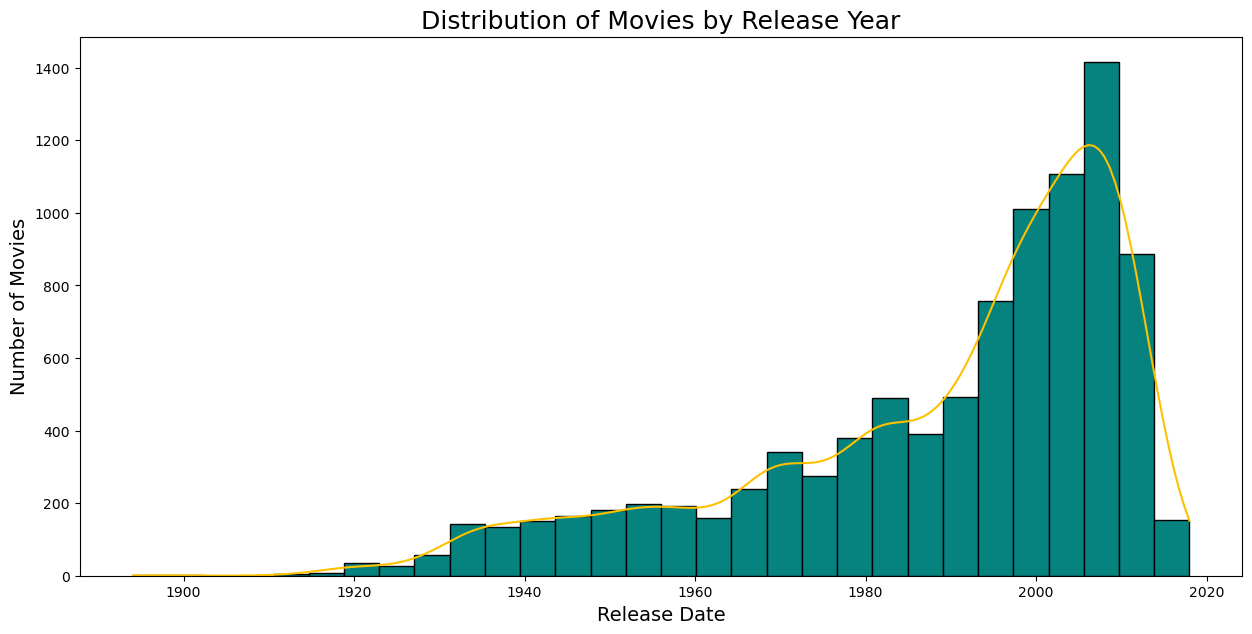

In [46]:
# 1. Plotting the histogram for movie release years
plt.figure(figsize=(15, 7))
sns.histplot(data=movies_df, x='release_date', bins=30, color='#fdc100', facecolor='#06837f', kde=True)
plt.title('Distribution of Movies by Release Year', fontsize=18)  # Increase title fontsize
plt.xlabel('Release Date', fontsize=14)  # Increase xlabel fontsize
plt.ylabel('Number of Movies', fontsize=14)  # Increase ylabel fontsize
plt.show()

We can see from just one movie in 1874 to nearly 2000 in peak years, the film industry has seen exponential growth, highlighting its enduring appeal. But, the sharp decline in movie releases in 2020, likely reflects the global impact of the COVID-19 pandemic on the industry. By 1985, the industry had matured significantly, with annual releases reaching up to 373, indicating a period of rapid expansion.

#### 4.2 Top Movie Genres
In this section, we identify and visualize in our dataset of the top 5 movie genres. We use a bar plot to display top 5 with the most occurrences genres and a pie chart to show their percentage distribution all genres.

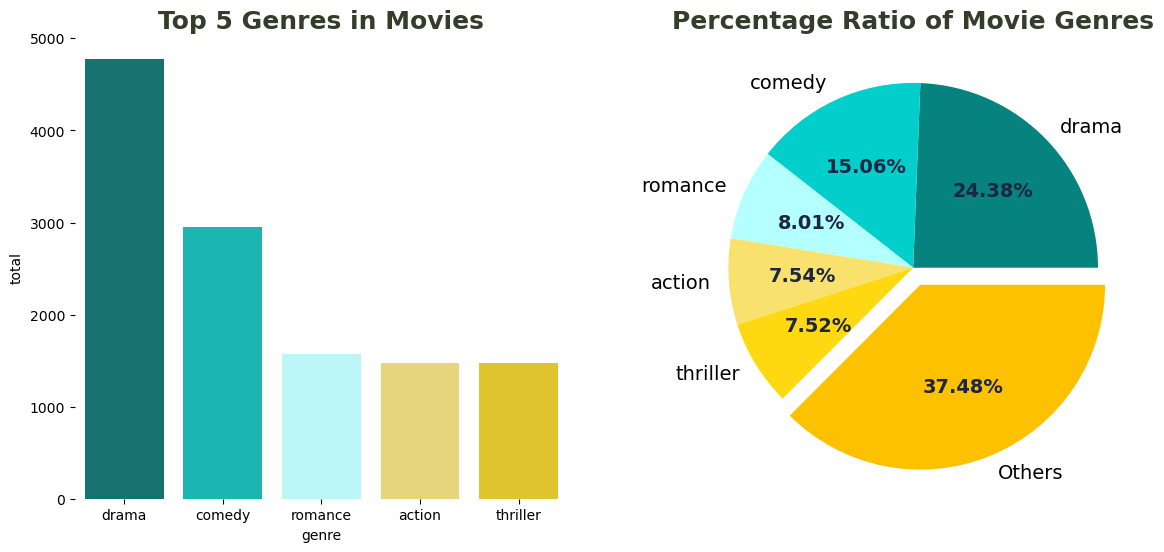

In [49]:
# 2. Top 5 Genre of Movies
# Flatten genres and count occurrences
genres_count = movies_df['genres']
genres_count = genres_count.apply(lambda x: ', '.join(x))
genres_count = Counter(', '.join(genres_count).split(', '))
df_top5 = pd.DataFrame(genres_count.most_common(5), columns=['genre', 'total'])

# Create the bar plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=df_top5, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
axes[0].set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')

# Create a DataFrame for all genres
df_all = pd.DataFrame(list(genres_count.items()), columns=['genre', 'total']).sort_values('total', ascending=False)

# Add 'Others' to top 5 DataFrame
df_top5.loc[len(df_top5)] = {'genre': 'Others', 'total': df_all[5:].total.sum()}

# Create the pie chart
wedges, texts, autotexts = axes[1].pie(df_top5['total'], labels=df_top5['genre'], autopct='%.2f%%',
                                       textprops={'fontsize': 14}, explode=[0, 0, 0, 0, 0, 0.1],
                                       colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])
axes[1].set_title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')

# Style the pie chart labels
for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

sns.despine(left=True, bottom=True)
axes[1].axis('off')

plt.show()

Total count of movie from this data shown that drama movies are the most common, followed by comedies that bring laughter. Thrillers offer excitement, romance films tell love stories, and action movies provide adventure. The “Others” category covers different genres, giving a wide variety of movie options. This insight highlights the diversity of choices for different preferences in movies.


### 5. Model Explorationl

#### 5.1 Baseline Model

In our recommender system journey, we begin by exploring five fundamental baseline models. These models serve as the foundation upon which we build and evaluate more advanced recommendation algorithms. Let’s dive into each of these baseline models:

a. **Global Mean Rating :** This model predicts the global average rating for all user-item pairs, providing a simple starting point for recommendations.

b.**User Mean Rating :** Here, we calculate the mean rating given by each user and use it to predict ratings for all items that the user hasn’t interacted with.

c.**Item Mean Rating :** In contrast to the User Mean Rating, this model focuses on the mean rating of each item and uses it to predict ratings for all users. 

d.**User-Item Mean Rating :** This model takes a more nuanced approach, predicting a rating for a user-item pair as the average of the user’s mean rating and the item’s mean rating. The formula is :

$$Prediction = $\frac{\text{User Mean Rating} + \text{Item Mean Rating}}{2}$$


e.**Weighted Mean Ratings :** The Weighted Mean Ratings model introduces flexibility by employing a weighted average of user mean and item mean ratings. We’ll determine the optimal weight through experimentation. The formula is :

$$
\text{Prediction} = \omega \times \text{User Mean Rating} + (1 - \omega) \times \text{Item Mean Rating}
$$


$$ where  ( 0 \leq \omega \leq 1 ) $$



To evaluate the baseline models, we’ll split out dataset into Data Train (75%) and Data Test (25%). The training set will be used to teach and build the recommendation model, while the testing set serves as an independent measure to assess the model’s performance. This ensures that our system provides accurate and reliable movie recommendations when used with real-world data.

In [72]:
# Split the data into training and testing sets (75% training, 25% testing)
train_df, test_df = train_test_split(ratings_df, test_size=0.25, random_state=42)

In [74]:
# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MSE
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

from sklearn.model_selection import train_test_split

# Calculate the global mean rating using the training set
global_mean_rating = train_df['rating'].mean()

# Predict global mean rating for the test set
test_df['global_mean_rating'] = global_mean_rating

# Calculate user and item mean ratings using the training set
user_mean_ratings = train_df.groupby('userId')['rating'].mean().reset_index()
item_mean_ratings = train_df.groupby('movieId')['rating'].mean().reset_index()

# Merge the mean ratings with the test set
test_df = pd.merge(test_df, user_mean_ratings, on='userId', how='left').rename(columns={'rating_y': 'user_mean_rating', 'rating_x': 'rating'})
test_df = pd.merge(test_df, item_mean_ratings, on='movieId', how='left').rename(columns={'rating_y': 'item_mean_rating', 'rating_x': 'rating'})

# Fill NAs with global mean rating
test_df['user_mean_rating'].fillna(global_mean_rating, inplace=True)
test_df['item_mean_rating'].fillna(global_mean_rating, inplace=True)

# Calculate User-Item Mean Rating
test_df['user_item_mean_rating'] = (test_df['user_mean_rating'] + test_df['item_mean_rating']) / 2

In [76]:
# Calculate Weighted Mean Ratings
# Initialize variables to store the best RMSE and corresponding weight
best_rmse = float('inf')
best_w = 0

# Loop through possible weights with a step of 0.1
for w in [i * 0.1 for i in range(11)]:
    test_df['weighted_mean_rating_tmp'] = w * test_df['user_mean_rating'] + (1 - w) * test_df['item_mean_rating']
    rmse = calculate_rmse(test_df['rating'], test_df['weighted_mean_rating_tmp'])
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_w = w

# Use the best weight to calculate the final weighted mean ratings
test_df['weighted_mean_rating'] = best_w * test_df['user_mean_rating'] + (1 - best_w) * test_df['item_mean_rating']
        

In [ ]:
# Constant Model with rating 2.5 for all user-item pairs
test_df['constant_rating'] = 2.5

# Calculate user mean ratings and number of ratings per user
user_stats = train_df.groupby('userId')['rating'].agg(['mean', 'count']).reset_index()

# Damping factor (you can adjust this)
damping_factor = 0.2

# Predict damped user-mean rating for the test set
test_df = test_df.merge(user_stats, on='userId', how='left')
test_df['damped_user_mean_rating'] = ((1 - damping_factor) * test_df['mean']) + (damping_factor * global_mean_rating)

# Calculate RMSE for the damped user-mean model
rmse_damped_user_mean = calculate_rmse(test_df['rating'], test_df['damped_user_mean_rating'])

# Calculate RMSE for global mean, user mean, and item mean models
rmse_global_mean = calculate_rmse(test_df['rating'], test_df['global_mean_rating'])
rmse_user_mean = calculate_rmse(test_df['rating'], test_df['user_mean_rating'])
rmse_item_mean = calculate_rmse(test_df['rating'], test_df['item_mean_rating'])
rmse_user_item_mean = calculate_rmse(test_df['rating'], test_df['user_item_mean_rating'])
rmse_weighted_mean = calculate_rmse(test_df['rating'], test_df['weighted_mean_rating'])
rmse_constant = calculate_rmse(test_df['rating'], test_df['constant_rating'])
rmse_damped_user_mean = calculate_rmse(test_df['rating'], test_df['damped_user_mean_rating'])

# Display the RMSE and MSE scores for all models
print(f"RMSE for Global Mean Rating Model: {rmse_global_mean:.2f}")
print(f"RMSE for User Mean Rating Model: {rmse_user_mean:.2f}")
print(f"RMSE for Item Mean Rating Model: {rmse_item_mean:.2f}")
print(f"RMSE for User-Item Mean Rating Model: {rmse_user_item_mean:.2f}")
print(f"RMSE for Weighted Mean Rating Model: {best_rmse:.2f}, with setting the best weight is {best_w:.2f}")
print(f"RMSE for Constant Model: {rmse_constant:.2f}")
print(f"RMSE for Damped User-Mean Rating Model: {rmse_damped_user_mean:.2f}")

### Understanding RMSE:

In our evaluation process, we’ll rely on Root Mean Squared Error (RMSE) as a key metric. RMSE quantifies how closely our model’s predictions align with actual ratings. A lower RMSE indicates a better-performing model.

- **RMSE for Global Mean Rating Model**: 1.06
- **RMSE for User Mean Rating Model**: 0.96
- **RMSE for Item Mean Rating Model**: 1.00
- **RMSE for User-Item Mean Rating Model**: 0.92
- **RMSE for Weighted Mean Rating Model**: 0.92 (best weight is 0.60)
- **RMSE for Constant Model**: 1.49
- **RMSE for Damped User-Mean Rating Model**: 0.96
: 0.96

In simple terms, these baseline models provide essential insights into the recommendation process. Notably, the User-Item Mean Rating Model and the Weighted Mean Rating Model perform exceptionally well with an RMSE of 0.92. This indicates that combining user and item mean ratings results in more accurate predictions.

It’s important to remember that these baseline models serve as our starting point. More advanced machine learning models, such as collaborative filtering or hybrid models, offer personalized recommendations based on individual user behavior. These models aim to achieve lower RMSE scores, signifying superior recommendation accuracy.

By exploring these baseline models, we gain valuable insights and establish a performance benchmark for our recommendation system.


#### 5.2 Collaborative Filtering

In this section, we will construct a collaborative filtering recommender system using the Surprise library. Our goal is to compare the performance of various collaborative filtering algorithms to identify the one that delivers the highest prediction accuracy, as quantified by the Root Mean Square Error (RMSE). These algorithms are SVD (Singular Value Decomposition), KNNWithZScore (K-Nearest Neighbors with Z-Score normalization), and SVDpp (SVD with Power Iteration).


#### Algorithms Exploration and Fine-Tuning :


Before we dive into the results, it’s crucial to understand that each algorithm has its set of parameters that can significantly impact its performance. We’ve fine-tuned these algorithms to extract their full potential:

- **SVD**: We experimented with factors like the number of latent factors, epochs, learning rate, and regularization to optimize its performance.
- **KNNWithZScore**: This algorithm involves parameters like the number of neighbors, minimum neighbors, and similarity options are optimized.
- **SVDpp**: Similar to SVD, but includes more factors and additional parameters like power iteration.

These three collaborative filtering algorithms will be optimized using the GridSearchCV method to fine-tune their hyperparameters through 3-fold cross-validation is applied to train the model. The objective is to identify the best-performing model by evaluating and comparing their Root Mean Square Error (RMSE) scores.


In [ ]:
from surprise import Reader, Dataset, SVD, KNNWithZScore, SVDpp
from surprise.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Create a Reader object specifying the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data into the Surprise Dataset
train_data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
test_data = Dataset.load_from_df(test_df[['userId', 'movieId', 'rating']], reader)

# Build the trainset and testset
trainset = train_data.build_full_trainset()
testset = test_data.build_full_trainset().build_testset()

In [ ]:
# List of algorithms
algorithms = [SVD, KNNWithZScore, SVDpp]

# Parameters for Grid Search
param_grid = {
    SVD: {
        'n_factors': [125, 150, 175],
        'n_epochs': [25, 30, 35],
        'lr_all': [0.008, 0.01, 0.012],
        'reg_all': [0.15, 0.2, 0.25]
    },
    KNNWithZScore: {
        'k': [35, 40, 45],
        'min_k': [1, 3, 5, 7],
        'sim_options': {
            'name': ['msd', 'cosine', 'pearson'],
            'user_based': [True, False]
        }
    },
    SVDpp: {
        'n_factors': [20, 50, 100, 140, 150, 160],
        'n_epochs': [20, 25],
        'lr_all': [0.001, 0.002, 0.005, 0.009, 0.01, 0.011],
        'reg_all': [0.18, 0.2, 0.22, 0.4, 0.6, 0.8]
    }
}

best_models = {}
best_params = {}
best_rmse_scores = {}

# Perform GridSearchCV for each algorithm
for algo in algorithms:
    gs = GridSearchCV(algo, param_grid[algo], measures=['rmse'], cv=3,n_jobs=-1, joblib_verbose=100)
    gs.fit(train_data)
    
    # Get the best model, best parameters, and best RMSE score
    best_models[algo.__name__] = gs.best_estimator['rmse']
    best_params[algo.__name__] = gs.best_params['rmse']
    best_rmse_scores[algo.__name__] = gs.best_score['rmse']

In [ ]:
# Visualize the RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(best_rmse_scores.keys(), best_rmse_scores.values(), color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Best RMSE Score')
plt.title('Best RMSE Scores by Algorithm')
plt.show()

# Print the best model, best parameters, and best RMSE score
for algo_name, model in best_models.items():
    print(f"Best Model for {algo_name}:\n", model)
    print(f"Best Parameters for {algo_name}:\n", best_params[algo_name])
    print(f"Best RMSE score for {algo_name}:\n", best_rmse_scores[algo_name])

In [ ]:
# Determine the best algorithm based on the lowest RMSE score
best_algo = min(best_rmse_scores, key=best_rmse_scores.get)

# Print the best algorithm, best parameters, and best RMSE score
print(f"Best Algorithm: {best_algo}")
print(f"Best Parameters: {best_params[best_algo]}")
print(f"Best RMSE score: {best_rmse_scores[best_algo]}")

#### Output :

**Best Algorithm**: SVD  
**Best Parameters**: `{'n_factors': 150, 'n_epochs': 35, 'lr_all': 0.012, 'reg_all': 0.15}`  
**Best RMSE score on Data Train**: 0.8970635747677034


Our quest for the best-performing model is grounded in meticulous comparison and evaluation. We employ various collaborative filtering algorithms, each with its unique strengths.

Upon running the code, we obtained the following RMSE scores for each algorithm:

- **SVD**: RMSE score of `0.897`
- **KNNWithZScore**: RMSE score of `0.929`
- **SVDpp**: RMSE score of `0.898`

Remarkably, the SVD algorithm stands out with the lowest RMSE score of 0.897, indicating its exceptional accuracy. Its optimal hyperparameters, the secret to its success, are as follows:


- `n_factors`: 150
- `n_epochs`: 35
- `lr_all`: 0.012
- `reg_all`: 0.15

Why is SVD the Best? SVD (Singular Value Decomposition) is a matrix factorization technique that decomposes the user-item interaction matrix into multiple matrices, capturing latent factors. These latent factors provide a condensed, yet effective, representation of the original data, allowing SVD to make more accurate predictions. In your case, SVD has been further fine-tuned with optimal hyperparameters, leading to the best RMSE score.

Next, we assess and refine our movie recommender system. Our aim is to find the best model for making movie recommendations. We save this top-performing model, train it on our train dataset, and use it to predict movie ratings on our test dataset. We then evaluate the model’s accuracy using metrics like RMSE (Root Mean Square Error). These metrics help us understand how well our system performs.


In [ ]:
# Predict ratings for the testset
best_algo_name = min(best_rmse_scores, key=best_rmse_scores.get)
best_algo_model = best_models[best_algo_name]

# Save the best model using pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_algo_model, f)

print("Best model saved to 'best_model.pkl'")

# Train the best algorithm on the entire training set
best_algo_model.fit(trainset)
    
predictions = best_algo_model.test(testset)

# Calculate RMSE for the predictions
rmse_score = accuracy.rmse(predictions)

# Calculate other accuracy measures
mae_score = accuracy.mae(predictions)
fcp_score = accuracy.fcp(predictions)

print(f"Evaluation Metrics:")
print(f"RMSE score: {rmse_score}")
print(f"MAE score: {mae_score}")
print(f"FCP score: {fcp_score}")

# Save the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)
predictions_df = predictions_df.rename(columns={'uid': 'userId', 'iid': 'movieId', 'r_ui': 'actual', 'est': 'predicted'})
predictions_df['error'] = np.abs(predictions_df['actual'] - predictions_df['predicted'])

# Save DataFrame to CSV file
predictions_df.to_csv('predictions.csv', index=False)

#### Ouput : 

**Evaluation Metrics:**

RMSE score on Data Test: 0.8848337145787749

The trained machine learning model achieved an RMSE score of 0.897 on the training data and improved slightly to 0.8848 when evaluated on the test data. This slight improvement in the test data suggests that the model is robust and generalizes well to unseen data, which is a positive sign of a good model.

Moreover, these scores are notably better than the baseline models. The User-Item Mean Rating Model and the Weighted Mean Rating Model both achieved an RMSE of 0.92. Given that the machine learning model outperforms these simpler baseline models, it confirms the efficacy of using a more complex algorithm for this recommendation system.

In summary, the machine learning model not only performs well on the training data but also shows a strong capability to generalize to new, unseen data. This makes it a suitable candidate for deployment in a real-world recommendation system.


#### 5.3 Weighted Ratings

In this section, we calculate a weighted rating for each movie to improve our movie recommendation system. The goal is to suggest high-quality and popular movies.

We’ve strategized in 5 steps:

#### A. Data Preparation
We start by filtering out movies with missing values in `vote_average` or `vote_count`.

#### B. Rating Metrics
To calculate our weighted ratings, we’re bringing in some metrics.

- \( R \): Average rating for the movie
- \( v \): Number of votes for the movie
- \( m \): Minimum votes required (90th percentile)
- \( C \): The mean vote average across all movies

#### C. Weighted Rating Formula
We’ll apply the IMDB formula to calculate a weighted rating for each movie. This formula takes into account the average rating (\( R \)), the overall average (\( C \)), the number of votes (\( v \)), and a minimum vote threshold (\( m \)):


$$  \text{Weighted Rating} = \frac{R \times v + C \times m}{v + m} $$

#### D. Feature Scaling
We’ll normalize `popularity` and `weighted_average` using MinMax scaling.

#### E. Score Calculation
This is where the magic happens. Each movie gets a score, a mix of various factors: 40% `weighted_average`, 40% `popularity`, 5% `time_decay_factor`, and 15% `normalized_revenue`.

#### D. Rank and Display
We rank movies based on their scores in descending order to provide a list of top-rated and popular movies.


In [ ]:
# Assuming movies_df contains columns: 'vote_average', 'vote_count', 'popularity', 'year', 'revenue'

# Filter out movies with missing vote_average or vote_count
movies_df = movies_df[(movies_df['vote_average'].notnull()) | (movies_df['vote_count'].notnull())]

# Calculate R as the vote average for each movie
R = movies_df['vote_average']

# Calculate v as the vote count for each movie
v = movies_df['vote_count']

# Calculate m as the 90th percentile of vote count across all movies
m = movies_df['vote_count'].quantile(0.9)

# Calculate C as the mean vote average across all movies
C = movies_df['vote_average'].mean()

# Calculate the weighted average for each movie using the IMDB formula
# This formula helps to balance the average rating (R) with the overall average (C)
# It also considers the number of votes (v) and a minimum vote threshold (m)
movies_df['weighted_average'] = (R * v + C * m) / (v + m)

# Define a time decay factor (you can adjust this factor as needed)
# current_year = datetime.datetime.now().year
current_year = 2020 #lastest year movie release on the data
movies_df['time_decay_factor'] = 1 / (current_year - movies_df['year'] + 1)

# Normalize revenue between 0 and 1 (you may need to handle missing or zero revenue values)
max_revenue = movies_df['revenue'].max()
min_revenue = movies_df['revenue'].min()
movies_df['normalized_revenue'] = (movies_df['revenue'] - min_revenue) / (max_revenue - min_revenue)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'popularity', 'weighted_average', 'time_decay_factor', and 'normalized_revenue' columns
scaled = scaler.fit_transform(
    movies_df[['popularity', 'weighted_average', 'time_decay_factor', 'normalized_revenue']]
)

# Create a DataFrame from the scaled data
weighted_df = pd.DataFrame(
    scaled,
    columns=['popularity', 'weighted_average', 'time_decay_factor', 'normalized_revenue']
)

# Set the index of the new DataFrame to match the 'original_title' of the movies
weighted_df.index = movies_df['id']

# Calculate the 'score' based on a weighted combination of factors
# Adjust the weights as needed (e.g., 40% weighted_average, 40% popularity, 5% time_decay_factor, 15% normalized_revenue)
weighted_df['score'] = (
    weighted_df['weighted_average'] * 0.4 +
    weighted_df['popularity'] * 0.4 +
    weighted_df['time_decay_factor'] * 0.05 +
    weighted_df['normalized_revenue'] * 0.15
)

# Sort the DataFrame based on the 'score' column in descending order.
# This will bring movies with the highest blended score to the top.
weighted_df_sorted = weighted_df.sort_values(by='score', ascending=False)

# Display the top 10 movies with the highest scores.
# These are the movies that are well-rated, popular, possibly more recent, and have good revenue.
top_10_movies = weighted_df_sorted.head(10)

# Optionally, you can join this top_10_movies DataFrame with the original movies_df to get more movie details.
result_df = pd.merge(top_10_movies, movies_df[['id','original_title', 'year', 'revenue']], on='id', how='left')

# Display the result DataFrame
result_df[['original_title', 'year', 'revenue', 'score']]

#### Output : 

After all the calculations, we’ll have a list of top-rated and popular movies, ranked by their scores in descending order. This is where we unveil our top recommendations.

We’re also considering a time decay factor to give newer movies a little extra boost, and we’re normalizing revenue to ensure it doesn’t dominate the scores.

|   | original_title                    | year | revenue      | score   |
|---|-----------------------------------|------|--------------|---------|
| 0 | Minions                           | 2015 | 1.156731e+09 | 0.699055|
| 1 | Avatar                            | 2009 | 2.787965e+09 | 0.584354|
| 2 | Wonder Woman                      | 2017 | 8.205804e+08 | 0.564407|
| 3 | Beauty and the Beast              | 2017 | 1.262886e+09 | 0.551252|
| 4 | Big Hero 6                        | 2014 | 6.521054e+08 | 0.540299|
| 5 | The Dark Knight                   | 2008 | 1.004558e+09 | 0.532660|
| 6 | Guardians of the Galaxy Vol. 2    | 2017 | 8.634161e+08 | 0.518944|
| 7 | Deadpool                          | 2016 | 7.783113e+08 | 0.500611|
| 8 | Pulp Fiction                      | 1994 | 2.193288e+08 | 0.499935|
| 9 | Gone Girl                         | 2014 | 3.693304e+08 | 0.498902|

*Top 10 Movies with highest score*


#### 5.4 Content-Based Filtering

Our journey into movie recommendation continues with a technique known as content-based filtering. It’s like having a movie buff friend who suggests films based on your unique taste.

Content-based filtering, powered by Cosine Similarity, is all about analyzing the content of movies to find similarities. We’re talking keywords, genres, cast, and director — all those details that make a movie what it is. The model crunches these attributes to measure how alike two movies are. If they’re a close match, they make the recommendation cut.

The model then sorts these calculated scores and recommends the top 10 movies most similar to the user’s chosen film. The underlying idea is that if a user enjoys a particular movie, they are likely to appreciate similar ones as well.


In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df['title'].iloc[movie_indices]

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_df['bag_of_words'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

#### A. Recommendation Movies “The Dark Knight Rises”

```python
get_recommendations('The Dark Knight Rises', cosine_sim2)

12476    The Dark Knight
10110    Batman Begins
 9214    Shiner
 9775    Amongst Friends
 7679    Mitchell
  514    Romeo Is Bleeding
11348    The Prestige
23716    Quicksand
24641    Deadfall
39964    Sara
Name: title, dtype: object


Let’s say you’re a fan of the caped crusader and want recommendations for “The Dark Knight Rises.” The model serves up a mix of suggestions. Of course, you’ll find other Batman flicks like “The Dark Knight” and “Batman Begins.” But it goes beyond that, recognizing Christopher Nolan’s directorial style with “The Prestige.” Then, it throws in


#### B. Recommendation Movies “The Godfather”

```python
get_recommendations('The Godfather', cosine_sim2)

 1899    The Godfather: Part III
 1170    The Godfather: Part II
15423    The Rain People
18688    Last Exit
33762    Rege
34997    Manuscripts Don't Burn
34998    Manuscripts Don't Burn
 7908    The Night of the Following Day
18021    The Son of No One
28192    In the Name of the Law
Name: title, dtype: object


Now, picture yourself in the world of the Corleone family. When you ask for recommendations for “The Godfather,” the model apply the sequels like “The Godfather: Part III” and “The Godfather: Part II.” Why stop there? It suggests “The Rain People,” another Coppola gem. And it doesn’t shy away from unconventional picks like “Manuscripts Don’t Burn” or “Rege,” highlighting its knack for considering various movie elements.s”


#### C. Recommendation Movies “Star Wars”

```python
get_recommendations('Star Wars', cosine_sim2)

 1146    The Empire Strikes Back
 1159    Return of the Jedi
22533    Behind Enemy Lines
  674    Solo
 2496    Star Wars: Episode I - The Phantom Menace
 5229    Star Wars: Episode II - Attack of the Clones
 7889    The Last Starfighter
10057    Star Wars: Episode III - Revenge of the Sith
21784    Ender's Game
26319    Star Wars: The Force Awakens
Name: title, dtype: object


Time for a galactic adventure! If you’re keen on “Star Wars,” the model knows what’s up. You’ll get the classics like “The Empire Strikes Back” and “Return of the Jedi.” But it also slips in films like “Behind Enemy Lines” and “Ender’s Game,” linked by themes or genres. It’s a balanced mix of the familiar and the intriguing.

#### 5.5 Hybrid Based Recommendation

In our quest to offer the ultimate movie recommendations, we’ve reached the pinnacle of personalized movie curation with the Hybrid-Based Recommendation system. This powerful approach combines the strengths of Content-based Filtering, Collaborative Filtering and Weighted Score to consider additional factors like popularity or the weighted average rating of a movie. The data score that we already get before can be using a mix of weighted average and popularity, which can be incorporated into the hybrid model to make the recommendations more robust.


#### 5.5.1 Predicting Movie Ratings for Users

In this part we will make a prediction how much a user might like a movie by giving it a rating. The function uses a mix of different methods: Collaborative Filtering, Content-Based Filtering, and Weighted Scoring to make this prediction as accurate as possible. It takes in the ID of a user and the ID of a movie, and then returns a predicted rating that shows how much that particular user is expected to like that particular movie.


In [ ]:
def hybrid_predicted_rating(userId, movieId):
    # Collaborative Filtering Prediction
    collaborative_rating = algo.predict(userId, movieId).est
    
    # Content-Based Filtering Prediction
    sim_scores = list(enumerate(cosine_sim2[movieId]))
    sim_scores = sorted(cosine_sim2, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    
    similar_movies = movies_df.iloc[movie_indices]
    similar_movies['est'] = similar_movies['id'].apply(lambda x: algo.predict(userId, x).est)
    content_rating = similar_movies['est'].mean()
    
    # Getting the Weighted Score
    weighted_score = weighted_df.loc[movies_df.loc[movieId, 'id'], 'score']
    
    # Hybrid Prediction using weighted average of collaborative_rating, content_rating, and weighted_score
    final_rating = (0.5 * collaborative_rating) + (0.2 * content_rating) + (0.3 * weighted_score)
    
    return final_rating

# Predict the rating for userId=1 and movieId=500
predicted_rating = hybrid_predicted_rating(userId=1, movieId=500)
print(f"The predicted hybrid rating for userId=1 and movieId=500 is: {predicted_rating}")

#### Output :

```python
The predicted hybrid rating for userId=1 and movieId=500 is: 1.8917287610381568

#### 5.5.2 Recommending Movies for Old Users

In this section, we will generate movie recommendations for users through our Hybrid Movie Recommender System. It requires a user ID and The function first uses collaborative filtering to predict movie ratings based on the user’s past behavior. It then employs content-based filtering to find movies similar to the user’s last watched movie. The function combines these two sets of recommendations, giving them equal weight, to generate a final list of top 10 recommended movies. This hybrid approach aims to provide more accurate and personalized movie suggestions.


In [ ]:
def fetch_weighted_scores(movie_ids, movies_df, weighted_df):
    weighted_df = weighted_df.loc[~weighted_df.index.duplicated(keep='first')]
    weighted_scores = {}
    for movie_id in movie_ids:
        if movie_id in weighted_df.index:
            weighted_scores[movie_id] = weighted_df.loc[movie_id]['score']
        else:
            weighted_scores[movie_id] = 0  # Assign default score of 0
    return weighted_scores

# Utility function to show details of recommended movies
def show_movie_details(movie_ids, movies_df):
    # Fetch movie details like title, genre, and director from the movies_df DataFrame
    details_df = movies_df[movies_df['id'].isin(movie_ids)][['title', 'year', 'genres', 'director']]
    
    # Display the details
    print("Recommended Movies:")
    for index, row in details_df.iterrows():
        print(f"Title: {row['title']} ({row['year']}), Genres: {', '.join(row['genres'])}, Director: {row['director']}")

def hybrid_recommendation(user_id, n=10):
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    predictions = []
    for index, row in user_ratings.iterrows():
        pred = algo.predict(row['userId'], row['movieId']).est
        predictions.append((row['movieId'], pred))
    top_collab_movies = [x[0] for x in sorted(predictions, key=lambda x: x[1], reverse=True)[:n]]
    
    last_watched_movieId = user_ratings.iloc[-1]['movieId']
    if last_watched_movieId in movies_df['id'].values:
        watched_movie_idx = movies_df[movies_df['id'] == last_watched_movieId].index[0]
        similar_movies = list(enumerate(cosine_sim2[watched_movie_idx]))
        sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:n+1]
        top_content_movies = [movies_df.iloc[i[0]]['id'] for i in sorted_similar_movies]
    else:
        print(f"Movie ID {last_watched_movieId} not found in movies_df.")
        top_content_movies = []

    collab_weighted_scores = fetch_weighted_scores(top_collab_movies, movies_df, weighted_df)
    content_weighted_scores = fetch_weighted_scores(top_content_movies, movies_df, weighted_df)
    
    combined_scores = {}
    for movie_id, score in collab_weighted_scores.items():
        combined_scores[movie_id] = combined_scores.get(movie_id, 0) + 0.5 * score
    for movie_id, score in content_weighted_scores.items():
        combined_scores[movie_id] = combined_scores.get(movie_id, 0) + 0.5 * score
    sorted_movies = sorted(combined_scores.keys(), key=lambda x: combined_scores[x], reverse=True)
    return sorted_movies[:n]

# Test the hybrid recommendation function
user_id = 36
recommended_movies = hybrid_recommendation(user_id)
print(f"Recommended movies for user {user_id}: {recommended_movies}")
show_movie_details(recommended_movies, movies_df)

#### Output :

```python
Recommended Movies for user 36 :
Title: Once Were Warriors (1994), Genres: drama, Director: leetamahori
Title: Rocky (1976), Genres: drama, Director: johng.avildsen
Title: Rocky III (1982), Genres: drama, Director: sylvesterstallone
Title: Rocky IV (1985), Genres: drama, Director: sylvesterstallone
Title: Scarface (1983), Genres: action, crime, drama, Director: briandepalma
Title: Rome, Open City (1945), Genres: drama, history, Director: robertorossellini
Title: Zatoichi (2003), Genres: adventure, drama, action, Director: takeshikitano
Title: Rumble Fish (1983), Genres: action, adventure, crime, Director: francisfordcoppola
Title: Broken Flowers (2005), Genres: comedy, drama, mystery, Director: jimjarmusch
Title: Rocky Balboa (2006), Genres: drama, Director: sylvesterstallone

#### 5.5.3 Recommending Movies for New Users

In this section, we explore various strategies to recommend movies to new users who have no historical data. We use two different approaches to tackle this issue:


#### 5.5.3.1 Recommendation Top Popular Movies

In this section we will provides a solution to the ‘cold start’ problem by recommending top-rated and recent movies to new users. It uses a DataFrame of movie IDs and their weighted scores to generate a list of top n movies from the last min_year years. The recommendations are sorted by a score that blends both popularity and user ratings. The function is designed to be flexible, allowing you to specify the number of recommendations and the time frame for recent movies.

In [ ]:
def recommend_for_new_user_top_rating_movies(df, movies_df, n=10, min_year=5):
    """
    Recommend the top n movies for a new user based on weighted rating scores.
    
    Parameters:
    df (DataFrame): DataFrame containing movie IDs and their weighted scores.
    n (int): Number of top movies to recommend.
    
    Returns:
    DataFrame: Top n recommended movies for a new user.
    """
    # Get the current year
    current_year = datetime.now().year

    # Sort the DataFrame based on the 'score' column in descending order.
    sorted_df = df.copy()
    sorted_df = pd.merge(sorted_df, movies_df[['id','year']], on='id', how='left')
    sorted_df['year'] = sorted_df['year'].fillna(0).astype(int)
    sorted_df = sorted_df[sorted_df['year']>=(current_year-min_year)]
    sorted_df = sorted_df.sort_values(by='score', ascending=False)
    # Return the top n movies.
    return sorted_df.head(n)

# Get the top 5 recommended movies for a new user
top_movies = recommend_for_new_user_top_rating_movies(weighted_df, movies_df[['id','year']], n=10, min_year=8)
show_movie_details(top_movies['id'], movies_df)

#### Output : 

```python
Recommended Movies:
Title: Pirates of the Caribbean: Dead Men Tell No Tales (2017), Genres: adventure, action, fantasy, Director: joachimrønning
Title: Deadpool (2016), Genres: action, adventure, comedy, Director: timmiller
Title: Guardians of the Galaxy Vol. 2 (2017), Genres: action, adventure, comedy, Director: jamesgunn
Title: Captain America: Civil War (2016), Genres: adventure, action, sciencefiction, Director: anthonyrusso
Title: Minions (2015), Genres: family, animation, adventure, Director: kylebalda
Title: Wonder Woman (2017), Genres: action, adventure, fantasy, Director: pattyjenkins
Title: Your Name. (2016), Genres: romance, animation, drama, Director: makotoshinkai
Title: Beauty and the Beast (2017), Genres: family, fantasy, romance, Director: billcondon
Title: Baby Driver (2017), Genres: action, crime, Director: edgarwright
Title: War for the Planet of the Apes (2017), Genres: drama, sciencefiction, war, Director: mattreeves

#### 5.5.3.2 Recommendation Top Popular Movies

In this section we will offers other approach to tackle the ‘cold start’ problem by recommending top-rated movies in various genres. It goes beyond a one-size-fits-all method and provides genre-specific lists of top n movies from the last min_year years. This way, new users can pick movies aligned with their genre preferences right from the start. The function returns a dictionary where each genre maps to a DataFrame of top recommendations, making it a versatile tool for personalized suggestions.


In [ ]:
def recommend_for_new_user_by_genre(df, movies_df, genres, n=10, min_year=5):
    """
    Recommend the top n movies for a new user based on weighted rating scores for each genre.
    
    Parameters:
    df (DataFrame): DataFrame containing movie IDs and their weighted scores.
    movies_df (DataFrame): DataFrame containing movie details.
    genres (list): List of genres to consider.
    n (int): Number of top movies to recommend for each genre.
    min_year (int): Minimum year for movies to be considered.
    
    Returns:
    dict: Dictionary where keys are genres and values are DataFrames containing top n recommended movies for that genre.
    """
    recommendations = {}
    
    movies_df = movies_df[['id','year', 'genres']]
    
    # Get the current year
    current_year = datetime.now().year
    
    for genre in genres:
        # Filter movies by genre
        genre_movies_df = movies_df[movies_df['genres'].apply(lambda x: genre in x if x else False)]
        
        # Merge with the df DataFrame to get scores
        genre_df = pd.merge(df, genre_movies_df[['id', 'year']], on='id', how='left')
        
        # Filter movies released in the last min_year years
        genre_df['year'] = genre_df['year'].fillna(0).astype(int)
        genre_df = genre_df[genre_df['year'] >= (current_year - min_year)]
        
        # Sort by score
        genre_df = genre_df.sort_values(by='score', ascending=False)
        
        # Get top n movies for this genre
        recommendations[genre] = genre_df.head(n)
        
    return recommendations

# List of genres to consider
# Extract unique genres
genres_set = set()
for genres_list in movies_df['genres']:
    genres_set.update(genres_list)

# Convert to list
genres_list = list(genres_set)

# Get the top 10 recommended movies for a new user for each genre
top_movies_by_genre = recommend_for_new_user_by_genre(weighted_df, movies_df, genres_list, n=10, min_year=10)
for genre in genres_list:
    print(genre)
    show_movie_details(top_movies_by_genre[genre]['id'], movies_df)

#### Output :

```python
Recommended Movies for Genre Dramas :
Title: 12 Years a Slave (2013), Genres: drama, history, Director: stevemcqueen
Title: Interstellar (2014), Genres: adventure, drama, sciencefiction, Director: christophernolan
Title: Whiplash (2014), Genres: drama, Director: damienchazelle
Title: Gone Girl (2014), Genres: mystery, thriller, drama, Director: davidfincher
Title: Dawn of the Planet of the Apes (2014), Genres: sciencefiction, action, drama, Director: mattreeves
Title: The Imitation Game (2014), Genres: history, drama, thriller, Director: mortentyldum
Title: Inside Out (2015), Genres: drama, comedy, animation, Director: petedocter
Title: Your Name. (2016), Genres: romance, animation, drama, Director: makotoshinkai
Title: Logan (2017), Genres: action, drama, sciencefiction, Director: jamesmangold
Title: War for the Planet of the Apes (2017), Genres: drama, sciencefiction, war, Director: mattreeves

Recommended Movies for Genre Comedy :
Title: About Time (2013), Genres: comedy, drama, sciencefiction, Director: richardcurtis
Title: The Wolf of Wall Street (2013), Genres: crime, drama, comedy, Director: martinscorsese
Title: The Grand Budapest Hotel (2014), Genres: comedy, drama, Director: wesanderson
Title: Love, Rosie (2014), Genres: comedy, romance, Director: christianditter
Title: Kingsman: The Secret Service (2015), Genres: crime, comedy, action, Director: matthewvaughn
Title: Deadpool (2016), Genres: action, adventure, comedy, Director: timmiller
Title: Guardians of the Galaxy Vol. 2 (2017), Genres: action, adventure, comedy, Director: jamesgunn
Title: Inside Out (2015), Genres: drama, comedy, animation, Director: petedocter
Title: Captain Fantastic (2016), Genres: adventure, comedy, drama, Director: mattross
Title: La La Land (2016), Genres: comedy, drama, music, Director: damienchazelle

Recommended Movies for Genre Science Fiction:
Title: Her (2013), Genres: romance, sciencefiction, drama, Director: spikejonze
Title: Interstellar (2014), Genres: adventure, drama, sciencefiction, Director: christophernolan
Title: Edge of Tomorrow (2014), Genres: action, sciencefiction, Director: dougliman
Title: Dawn of the Planet of the Apes (2014), Genres: sciencefiction, action, drama, Director: mattreeves
Title: Guardians of the Galaxy (2014), Genres: action, sciencefiction, adventure, Director: jamesgunn
Title: The Maze Runner (2014), Genres: action, mystery, sciencefiction, Director: wesball
Title: The Hunger Games: Mockingjay - Part 1 (2014), Genres: sciencefiction, adventure, thriller, Director: francislawrence
Title: Captain America: Civil War (2016), Genres: adventure, action, sciencefiction, Director: anthonyrusso
Title: Logan (2017), Genres: action, drama, sciencefiction, Director: jamesmangold
Title: War for the Planet of the Apes (2017), Genres: drama, sciencefiction, war, Director: mattreeves

Recommended Movies for Genre Animation:
Title: The Lego Movie (2014), Genres: adventure, animation, comedy, Director: phillord
Title: Big Hero 6 (2014), Genres: adventure, family, animation, Director: chriswilliams
Title: Inside Out (2015), Genres: drama, comedy, animation, Director: petedocter
Title: Minions (2015), Genres: family, animation, adventure, Director: kylebalda
Title: Zootopia (2016), Genres: animation, adventure, family, Director: byronhoward
Title: Zootopia (2016), Genres: animation, adventure, family, Director: byronhoward
Title: Piper (2016), Genres: family, animation, Director: alanbarillaro
Title: Your Name. (2016), Genres: romance, animation, drama, Director: makotoshinkai

### 6. Conclusion on

The comprehensive study presented in this article aims to build an effective movie recommender system using various machine learning techniques. We commenced our exploration with baseline models, such as Global Mean Rating, User Mean Rating, and Item Mean Rating, utilizing RMSE as a key performance metric. Advanced models like SVD, KNNWithZScore, and SVDpp were later introduced, with SVD emerging as the top performer after rigorous hyperparameter tuning and validation.

The article further extends into hybrid approaches, blending the strengths of both collaborative and content-based filtering methods, to provide a more personalized user experience. We also addressed the ‘cold start’ problem with new users, offering them top-rated and genre-specific movie recommendations.

The end result is a well-rounded, efficient, and adaptable movie recommender system that not only excels in training scenarios but also shows robust generalization when applied to unseen data.
